In [3]:
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:80% !important; }</style>"))

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://github.com/philhoonoh/os/blob/main/lecture_summary/02_Chapter3_part2.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View Source</a>
  </td>
</table>

# Self-Introduction with NLP 
> Welecome to Philhoon Oh's Self-Introduction with NLP. 

> In this notebook, I am going to introduce myself using various NLP tasks.

> It utilizes various packages such as Huggingface Transformer, sentence-transformers, and keybert. 

- 🌍 __Abstractive Summariztion__ w/ BART (Application Summarization)
- 🌍 __Text Generation__ w/ GPT2 (Generate NLP task description)  
- 🌍 __Text Classification__ w/ RoBERTa (MBTI analysis)
- ⭐ __Zero shot text classification__ w/ BART (MBTI analysis - deep) 
- 🌍 __Keyword Extraction__ w/ RoBERTa (What is teamwork?)  
- ⭐ __Image Classification__ w/ ViT 

```
💡 Colab Dark mode Preferred
```

In [3]:
# !pip install transformers
# !pip install sentencepiece
# !pip install sentence-transformers
# !pip install keybert

## 🌍 Abstractive Summariztion w/ BART (Application Summarization)

```python
* Summarizing personal application
* Model : facebook/bart-large-xsum
```

In [4]:
text = """Among the various fields of AI, I decided to focus on NLP not only because of my interests but also language plays a pivotal role in transfering knowledge. \
Humans appeared on Earth millions of years ago, but civilization has only been built around for thousands of years. \
It is only last few hundred years that humans made huge strides by accumulating knowlege via language. \
In others words, language enables people to think collectively beyond time and space.  
If we facilitate the speed of sharing knowledge by incorporating lanugage into machines, it would be possible for humans to make further progress.
"""

In [5]:
import torch
from transformers import PreTrainedTokenizerFast
from transformers import BartForConditionalGeneration

tokenizer = PreTrainedTokenizerFast.from_pretrained('facebook/bart-large-xsum')
model = BartForConditionalGeneration.from_pretrained('facebook/bart-large-xsum')

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'BartTokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.


In [6]:
input_ids = tokenizer.encode(text)
summary_ids = model.generate(torch.tensor([input_ids]), max_length=50)
tokenizer.decode(summary_ids.squeeze().tolist(), skip_special_tokens=True)

'As part of my PhD in artificial intelligence, I have been working with Natural Language Processing (NLP).'

```python
Result :
"As part of my PhD in artificial intelligence, I have been working with Natural Language Processing (NLP)."
Original text is from my graudate school application. 
Model indirectly recoginzes the original text relating to AI and graduate school.
```


## 🌍 Text Generation w/ GPT2 (Generate NLP task description)

```python
* Generating NLP task description
* Model : gpt2-xl
```

In [47]:
text = """I am also interested in various topics in AI such as large-scale training, MLOps, and etc.
With regards with NLP(Natural Language Processing), topics like MRC(Mahcine Reading Comprehension) and ODQA are intriguing. ODQA stands for
"""

In [8]:
from transformers import TFGPT2LMHeadModel, GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained('gpt2-xl')
model = TFGPT2LMHeadModel.from_pretrained('gpt2-xl', pad_token_id=tokenizer.eos_token_id)

All model checkpoint layers were used when initializing TFGPT2LMHeadModel.

All the layers of TFGPT2LMHeadModel were initialized from the model checkpoint at gpt2-xl.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


In [48]:
encoded_input = tokenizer.encode(text, return_tensors='tf')

In [53]:
beam_output = model.generate(
    encoded_input, 
    max_length=80, 
    num_beams=5, 
    early_stopping=True
)

In [54]:
print(tokenizer.decode(beam_output[0], skip_special_tokens=True))

I am also interested in various topics in AI such as large-scale training, MLOps, and etc.
With regards with NLP(Natural Language Processing), topics like MRC(Mahcine Reading Comprehension) and ODQA are intriguing. ODQA stands for
"Object-Oriented Reading Comprehension" and it is a very interesting topic in NLP


```python
Result :
"""ODQA stands for Object-Oriented Reading Comprehension" and it is a very interesting topic in NLP"""
Model tries to infer what ODQA stands for using previous context such as NLP, MRC.
It does not correctly identify on OD(Open Domain) part; however, it does on QA(Question Answering) part. 
```


## 🌍 Text Classification w/ SentenceTransformer (MBTI analysis) 

```python
* Analyze MBTI(Myers–Briggs Type Indicator) on given text by sentence embedding
* Model : stsb-roberta-large
```

In [3]:
query = "After graduating from college majored in statistics, I joined a company and worked on NLP. \
While I was working, I happened to encounter the Naver AI boostcamp course. \
I thought this was the time to take a break from the field and \
take a new chance to explore various fields in AI including MLOps, Product Serving and NLP."

In [1]:
from sentence_transformers import SentenceTransformer, util
import torch

model = SentenceTransformer('sentence-transformers/stsb-roberta-large')
# embeddings = model.encode(sentences)
# print(embeddings)

In [4]:
from collections import OrderedDict

mbti_dict = OrderedDict({
    "The Architect: High logical, they are both very creative and analytical." : 'INTJ',
    "The Thinker: Quiet and introverted, they are known for having a rich inner world" : 'INTP',
    "The Commander: Outspoken and confident, they are great at making plans and organizing projects." : 'ENTJ',
    "The Debater: Highly inventive, they love being surrounded by ideas and tend to start many projects (but may struggle to finish them)." : 'ENTP',
    "The Advocate: Creative and analytical, they are considered one of the rarest Myers-Briggs types." : 'INFJ',
    "The Mediator: Idealistic with high values, they strive to make the world a better place." : 'INFP',
    "The Giver: Loyal and sensitive, they are known for being understanding and generous." : 'ENFJ',
    "The Champion: Charismatic and energetic, they enjoy situations where they can put their creativity to work" : 'ENFP',
    "The Inspector: Reserved and practical, they tend to be loyal, orderly, and traditional." : 'ISTJ',
    "The Protector: Warm-hearted and dedicated, they are always ready to protect the people they care about." : 'ISFJ',
    "The Director: Assertive and rule-oriented, they have high principles and a tendency to take charge." : 'ESTJ',
    "The Caregiver: Soft-hearted and outgoing, they tend to believe the best about other people." : 'ESFJ',
    "The Crafter: Highly independent, they enjoy new experiences that provide first-hand learning." : 'ISTP',
    "The Artist: Easy-going and flexible, they tend to be reserved and artistic." : 'ISFP',
    "The Persuader: Out-going and dramatic, they enjoy spending time with others and focusing on the here-and-now" : 'ESTP',
    "The Performer: Outgoing and spontaneous, they enjoy taking center stage." : 'ESFP'
})


mbti_keys = list(mbti_dict.keys())

mbti_embeddings = model.encode(mbti_keys)

query_embedding = model.encode(query)

cos_scores = util.pytorch_cos_sim(query_embedding, mbti_embeddings)[0]
result = torch.argsort(cos_scores, descending = True)

for i, (score, idx) in enumerate(zip(cos_scores, result)):
    print(f"{i+1}: {mbti_dict[mbti_keys[idx]]} {'(cosine similarity: {:.4f})'.format(cos_scores[idx])}")


1: ENFP (cosine similarity: 0.3742)
2: ENTP (cosine similarity: 0.3546)
3: ISTP (cosine similarity: 0.3344)
4: ESTP (cosine similarity: 0.3278)
5: INFJ (cosine similarity: 0.3135)
6: INFP (cosine similarity: 0.3053)
7: ISFP (cosine similarity: 0.2766)
8: INTJ (cosine similarity: 0.2750)
9: ESFP (cosine similarity: 0.2419)
10: INTP (cosine similarity: 0.2363)
11: ENTJ (cosine similarity: 0.1980)
12: ESFJ (cosine similarity: 0.1530)
13: ESTJ (cosine similarity: 0.1298)
14: ISTJ (cosine similarity: 0.0552)
15: ENFJ (cosine similarity: 0.0532)
16: ISFJ (cosine similarity: 0.0224)


```python
Result :
""""After graduating from college majoried in statistics, I joined a company and worked on NLP. 
While I was working, I happened to encounter the Naver AI boostcamp course. 
I thought this was the time to take a break from the field and 
take a new chance to explore various fields in AI including MLOps, Product Serving and NLP.""""
In terms of MBTI test using Sentence Trasnformer, cosine similarity is somewhat low. (True MBTI is INTP) 
Maybe this is due to the several reasons described below:
  1. There was no training on MBTI test
  2. Descriptions are short
  3. Query is inappropriate

It would be possible to view it as classification task if we had been enough data
However, for now let's try zero-shot classification 
```


## ⭐ zero shot text classification w/ BART(mnli) (MBTI analysis - deep)

```python
* Analyze MBTI by zero-shot classification
* Model : facebook/bart-large-mnli
```

In [5]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification", device=0)

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [6]:
sequences = [
    query
]

mbti_keys = list(mbti_dict.keys())
candidate_labels = mbti_keys
hypothesis_template = "Aforementioned person can be described as {}."

result = classifier(sequences, candidate_labels, hypothesis_template=hypothesis_template)

In [7]:
for i, (score, label) in enumerate(zip(result[0]['scores'], result[0]['labels'])):
  print(f"{i+1}: {mbti_dict[label]} {'(zero shot score: {:.4f})'.format(score)}")


1: ISTP (zero shot score: 0.1429)
2: INTJ (zero shot score: 0.1109)
3: INFJ (zero shot score: 0.1038)
4: ISFP (zero shot score: 0.0951)
5: ENFP (zero shot score: 0.0935)
6: INTP (zero shot score: 0.0751)
7: ENFJ (zero shot score: 0.0647)
8: ISFJ (zero shot score: 0.0631)
9: ISTJ (zero shot score: 0.0512)
10: ESTJ (zero shot score: 0.0500)
11: ESFJ (zero shot score: 0.0379)
12: INFP (zero shot score: 0.0316)
13: ENTP (zero shot score: 0.0272)
14: ENTJ (zero shot score: 0.0233)
15: ESFP (zero shot score: 0.0201)
16: ESTP (zero shot score: 0.0096)


```python
Result :
Although there is only one test case,
MBTI test using zero-shot classification performs better. 
  1. INTP : 10 -> 6
  2. 'I', 'N' generally gets more score

Maybe this result comes from the facts :
  1. Using model trained on MNLI is effective 
  2. Hypothesis can be used as a prompt to bridge the gap between given two sentences

```


## 🌍 Keyword Extraction w/ KeyBERT (What is teamwork?)

```python
* Extract Keyword from Internet article about teamwork 
* Model : sentence-transformers/stsb-roberta-large

# I think the best compliment for developers is 'people who want to work with' rather than 'people who are good at programming.'
# Like the ideaology of ​​open source, which encourges developers to freely share technological advancements,
# I would like to collaborate with people from various fields who wish to enhance human lifestyle via NLP.
```
---



In [8]:
text = """
Teamwork is, “The process of working collaboratively with a group of people in order to achieve a goal. \
Teamwork is often a crucial part of a business, as it is often necessary for colleagues to work well together, \
trying their best in any circumstance. Teamwork means that people will try to cooperate, using their individual skills and \
providing constructive feedback, despite any personal conflict between individuals. (Source: BusinessDictionary.com)”
"""

In [9]:
from keybert import KeyBERT
from sentence_transformers import SentenceTransformer

sentence_model = SentenceTransformer("sentence-transformers/stsb-roberta-large")
kw_model = KeyBERT(model=sentence_model)

In [10]:
keywords = kw_model.extract_keywords(text, stop_words='english', top_n=10)

In [11]:
keywords

[('teamwork', 0.4398),
 ('collaboratively', 0.3885),
 ('cooperate', 0.3609),
 ('colleagues', 0.3099),
 ('businessdictionary', 0.298),
 ('constructive', 0.2407),
 ('working', 0.2128),
 ('trying', 0.2094),
 ('skills', 0.2003),
 ('try', 0.1968)]

```python
Result : 
Words like 'teamwork', 'collaboratively', 'cooperate' were extracted from the article.
It seems that words relating to teamwork were chosen properly.
```


## ⭐ Image Classification w/ ViT  


```python
* Analyze profile picture using ViT
* Model : google/vit-base-patch16-224
```

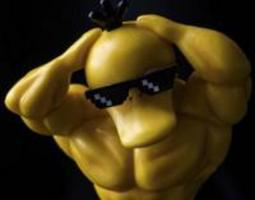

In [14]:
from transformers import ViTFeatureExtractor, ViTForImageClassification
from PIL import Image
import requests
import urllib

# Download Image 
url = 'https://i.imgur.com/Q7TFJNL.jpg?2'
urllib.request.urlretrieve(url, "./image.jpg")
image = Image.open("./image.jpg")
image

In [15]:
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits

In [16]:
socre_lst = torch.squeeze(logits, dim = 0).tolist()
predicted_class_lst = torch.squeeze(logits.argsort(descending = True), dim = 0).tolist()

In [17]:
top_k = 5

for idx, predicted_class_idx in enumerate(predicted_class_lst):
    print(f'{idx+1} - {model.config.id2label[predicted_class_idx]} - {socre_lst[predicted_class_idx]}')
    if idx + 1 == top_k:
        break

1 - sunglass - 7.656713008880615
2 - can opener, tin opener - 6.42052698135376
3 - comic book - 6.390259265899658
4 - sunglasses, dark glasses, shades - 5.73841667175293
5 - corkscrew, bottle screw - 5.57749080657959


```python
Result : 
The pictcure is psyduck figure wearing sunglasses from 'Pokémon'
Model well recognizes sunglasses! 🎉🎊🎉
```
